In [493]:
import numpy as np
import os

dataset = np.loadtxt((os.path.join(os.getcwd(), 'inputs\even_mnist.csv')), dtype=np.float32)
labels = dataset[:,-1]/2
data = dataset[:,:-1]
print(labels)
print(data)

[0.00000 2.00000 1.00000 ... 4.00000 3.00000 4.00000]
[[0.00000 0.00000 0.00000 ... 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 ... 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 ... 0.00000 0.00000 0.00000]
 ...
 [0.00000 0.00000 0.00000 ... 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 ... 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 ... 0.00000 0.00000 0.00000]]


Turn labels into vectors [0,0,1,0,0] = 4, [1,0,0,0,0] = 0

In [494]:
# label_dict = {0.:np.array([1,0,0,0,0]),
#               2.:np.array([0,1,0,0,0]), 
#               4.:np.array([0,0,1,0,0]), 
#               6.:np.array([0,0,0,1,0]), 
#               8.:np.array([0,0,0,0,1]), }
# new_labels = np.empty((labels.shape[0], 5))
# for i in range(labels.shape[0]):
#     new_labels[i,:] = label_dict[labels[i,0]]
# labels = new_labels.copy()

In [495]:
import torch
import torch.nn as nn
import torch.nn.functional as func


In [496]:
# define our network as an object

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # defining our layers
        self.fc1 = nn.Linear(196, 784) # Go from input size to 4 * input size 
        self.fc2 = nn.Linear(784, 40) # Compress down to just 40 neurons
        self.fc3 = nn.Linear(40, 5) # final compress from 40 to 5 output options

    def forward(self, x): # x is input vector
        h1 = func.relu(self.fc1(x)) # relu for layer 1
        h2 = func.relu(self.fc2(h1))
        y = func.log_softmax(self.fc3(h2), dim=1) # final evaluation done with softmax
        return y

    def reset(self):
        self.fc1.reset_parameters()
        self.fc2.reset_parameters()
        self.fc3.reset_parameters()

In [497]:
model = Net().to(torch.device("cpu"))

In [498]:
import torch.optim as optim
learning_rate = 0.003

In [499]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

Split data into training and test - 80/20 split

In [500]:
num_data = data.shape[0]

train_data, test_data = data[:int(num_data*0.80), :], data[int(num_data*0.80):, :]
train_labels, test_labels = labels[:int(num_data*0.80)], labels[int(num_data*0.80):]

Convert numpy arrays to tensors

In [501]:
train_input = torch.from_numpy(train_data.astype(np.float32))
train_labels = torch.from_numpy(train_labels.astype(np.float32)).type(torch.LongTensor)
test_input = torch.from_numpy(test_data.astype(np.float32))
test_labels = torch.from_numpy(test_labels.astype(np.float32)).type(torch.LongTensor)

In [502]:
model.forward(train_input).size()

torch.Size([23593, 5])

Defining a loss function

In [503]:
print(model.forward(train_input).size())
print(train_labels.size())

# loss = func.nll_loss()
# loss(model.forward(train_input), train_labels)

torch.Size([23593, 5])
torch.Size([23593])


hyperparameters for epochs and display epochs

In [504]:
num_epochs = 2000
display_epochs = 100

Training and testing in one loop:

In [505]:
obj_vals= []
cross_vals= []

model.reset() # reset your parameters

for epoch in range(num_epochs):

    obj_val = func.nll_loss(model.forward(train_input), train_labels)
    
    optimizer.zero_grad()
    obj_val.backward()
    optimizer.step()
    obj_vals.append(obj_val.item())

    if (epoch+1) % display_epochs == 0:
        print ('Epoch [{}/{}]\t Training Loss: {:.4f}'.format(epoch+1, num_epochs, obj_val.item()))
            
    # as it trains check how well it tests
    with torch.no_grad(): 
        # don't track calculations in the following scope for the purposes of gradients
        cross_val = func.nll_loss(model.forward(test_input), test_labels)
        cross_vals.append(cross_val)

    if (epoch+1) % display_epochs == 0:
        print ('Epoch [{}/{}]\t Test Loss: {:.4f}'.format(epoch+1, num_epochs, cross_val.item()))
        
print('Final training loss: {:.4f}'.format(obj_vals[-1]))
print('Final test loss: {:.4f}'.format(cross_vals[-1]))

Epoch [100/2000]	 Training Loss: 0.1498
Epoch [100/2000]	 Test Loss: 0.1458
Epoch [200/2000]	 Training Loss: 0.0996
Epoch [200/2000]	 Test Loss: 0.1071
Epoch [300/2000]	 Training Loss: 0.0785
Epoch [300/2000]	 Test Loss: 0.0923
Epoch [400/2000]	 Training Loss: 0.0654
Epoch [400/2000]	 Test Loss: 0.0840
Epoch [500/2000]	 Training Loss: 0.0562
Epoch [500/2000]	 Test Loss: 0.0786
Epoch [600/2000]	 Training Loss: 0.0494
Epoch [600/2000]	 Test Loss: 0.0749
Epoch [700/2000]	 Training Loss: 0.0439
Epoch [700/2000]	 Test Loss: 0.0720
Epoch [800/2000]	 Training Loss: 0.0394
Epoch [800/2000]	 Test Loss: 0.0699
Epoch [900/2000]	 Training Loss: 0.0356
Epoch [900/2000]	 Test Loss: 0.0683
Epoch [1000/2000]	 Training Loss: 0.0324
Epoch [1000/2000]	 Test Loss: 0.0670
Epoch [1100/2000]	 Training Loss: 0.0296
Epoch [1100/2000]	 Test Loss: 0.0660
Epoch [1200/2000]	 Training Loss: 0.0271
Epoch [1200/2000]	 Test Loss: 0.0651
Epoch [1300/2000]	 Training Loss: 0.0249
Epoch [1300/2000]	 Test Loss: 0.0644
Epoc

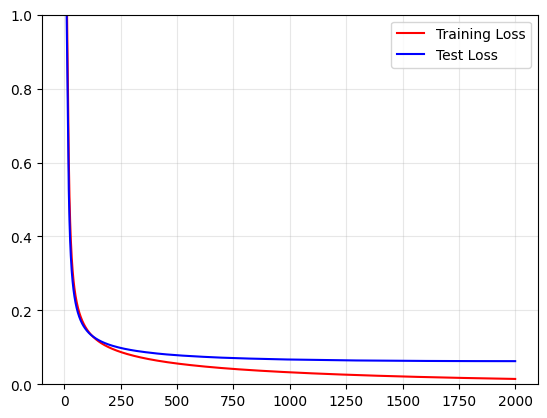

In [506]:
import matplotlib.pyplot as plt
plt.plot(range(num_epochs), obj_vals, 'r', label='Training Loss')
plt.plot(range(num_epochs), cross_vals, 'b', label="Test Loss")
plt.plot()
plt.ylim(0,1)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Stop all gradient calculations when doing testing to be faster

In [509]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})
print(cross_val)
print(np.exp(model.forward(test_input).detach().numpy()))

tensor(0.0638)
[[0.00000 0.00000 0.00000 1.00000 0.00000]
 [0.00000 0.00000 0.00000 1.00000 0.00000]
 [0.00001 0.00000 0.98261 0.00025 0.01713]
 ...
 [0.00000 0.00004 0.00000 0.00000 0.99996]
 [0.00000 0.00000 0.00000 1.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 1.00000]]


The percentages visible above are the confidence in each of the classification. With classifications of : [0,2,4,6,8]

In [510]:
print(test_labels*2)

tensor([6, 6, 4,  ..., 8, 6, 8])


We see that it matches the test labels in the above cell.

If instead we have 6 output neurons then one of them is just 0 always because there is only 5 different labels not 6.

Generating a test accuracy report: average over all predictions, as well as if each prediction is right.

In [513]:
results = np.exp(model.forward(test_input).detach().numpy())

eval = np.empty((results.shape[0], 2))
for i, result in enumerate(results):
    eval[i, 0] = np.argmax(result)*2
    eval[i, 1] = np.max(result)

eval

array([[6.00000, 1.00000],
       [6.00000, 1.00000],
       [4.00000, 0.98261],
       ...,
       [8.00000, 0.99996],
       [6.00000, 1.00000],
       [8.00000, 1.00000]])

In [520]:
sum = 0
for result, label in zip(eval[:,0].astype(int), test_labels.detach().numpy()*2):
    if result != label:
        sum += 1
        

print(f"prediction accuracy: {(1-sum/eval.shape[0])*100:.1f}%")

prediction accuracy: 98.4%
